In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
import main_LSTM as LSTM

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import Load_data as ld

In [185]:
from keras.models import load_model

Using TensorFlow backend.


In [46]:
def show_img(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

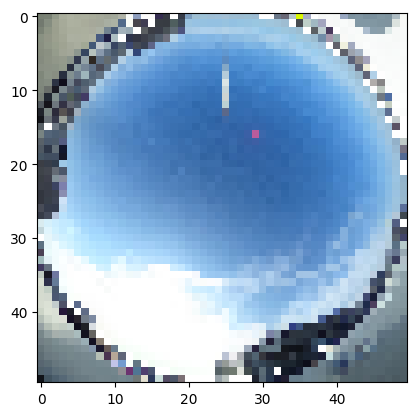

In [9]:
img_path = '../data/PV_IMAGE/201611/20161117_IT_resampled_northup/20161117T131759_IT.png'
img_tmp = Image.open(img_path)
img_tmp = img_tmp.resize((50, 50))
img_tmp = np.asarray(img_tmp, dtype=np.uint8)
show_img(img_tmp)

In [3]:
SAVE_dir = "./RESULT/tmp"
def make_date():
    '''
    人工データの作成。
    '''
    # test
    time = 15
    row = 80
    col = 80
    filters = 1
    training = 1200
    train = np.zeros((training, time, row, col, 1), dtype=np.float)
    gt = np.zeros((training, time, row, col, 1), dtype=np.float)
    # for i in range(1000):
    #    gt[::,0,0,0] = np.random.random()

    for i in range(training):
        n = np.random.randint(3, 8)
        # n=15
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            directionx = np.random.randint(0, 3) - 1
            gravity = 0  # np.random.randint(0,3) - 1
            w = np.random.randint(2, 4)
            # rint directionx,directiony
            for t in range(time):
                # w = 2
                train[i, t, xstart + directionx * t - w:xstart + directionx * t + w,
                      ystart + directiony * t + int(0.1 * gravity * t**2) - w:ystart + directiony * t + int(0.1 * gravity * t**2) + w, 0] += 1

                # Make it more robust
                # Noise
                if np.random.randint(0, 2):
                    train[i, t, xstart + directionx * t - w - 1:xstart + directionx * t + w + 1,
                          ystart + directiony * t + int(0.1 * gravity * t**2) - w - 1:ystart + directiony * t + int(0.1 * gravity * t**2) + w + 1, 0] += 0.1

                if np.random.randint(0, 2):
                    train[i, t, xstart + directionx * t - w + 1:xstart + directionx * t + w - 1,
                          ystart + directiony * t + int(0.1 * gravity * t**2) + w - 1:ystart + directiony * t + int(0.1 * gravity * t**2) + w - 1, 0] -= 0.1

                gt[i, t, xstart + directionx * (t + 1) - w:xstart + directionx * (t + 1) + w,
                   ystart + directiony * (t + 1) + int(0.1 * gravity * (t + 1)**2) - w:ystart + directiony * (t + 1) + int(0.1 * gravity * (t + 1)**2) + w, 0] += 1

    train = train[::, ::, 20:60, 20:60, ::]
    gt = gt[::, ::, 20:60, 20:60, ::]
    train[train >= 1] = 1
    gt[gt >= 1] = 1
    return train, gt

# convLSTMの重みを読み込む

In [183]:
# イメージディレクトリの読み込み
img_dir = '../data/PV_IMAGE/201705/20170518_IT_resampled_northup/'
img_0518 = ld.load_image(imgdir=img_dir, size=(50, 50), norm=True, median=True)

---------- Image Load Done


In [202]:
# モデルの読み込み
model = "./RESULT/2017_11_21/model_20170518_mean_squared_error.h5"
model = load_model(model)

In [188]:
array_steps = LSTM.array2LSTM(img_0518, num_frame=15)

add new axis


In [203]:
plt.figure()
save_dir = './RESULT/tmp/'
img_pred = LSTM.predict_convLSTM2D(model, img_0518, save_dir, date='0518', start=30, return_array=True)

frame:  7
start predicting from 30 to 37
(7, 50, 50, 3) (50, 50, 3)
(8, 50, 50, 3) (50, 50, 3)
(9, 50, 50, 3) (50, 50, 3)
(10, 50, 50, 3) (50, 50, 3)
(11, 50, 50, 3) (50, 50, 3)
(12, 50, 50, 3) (50, 50, 3)
(13, 50, 50, 3) (50, 50, 3)
(14, 50, 50, 3) (50, 50, 3)
(15, 50, 50, 3) (50, 50, 3)
(16, 50, 50, 3) (50, 50, 3)
(17, 50, 50, 3) (50, 50, 3)
(18, 50, 50, 3) (50, 50, 3)
(19, 50, 50, 3) (50, 50, 3)
(20, 50, 50, 3) (50, 50, 3)
(21, 50, 50, 3) (50, 50, 3)
(22, 50, 50, 3) (50, 50, 3)


In [193]:
array_pred = np.asarray(img_pred)
print(array_pred.shape)
print(array_pred[0].mean())

(15, 50, 50, 3)
0.205518


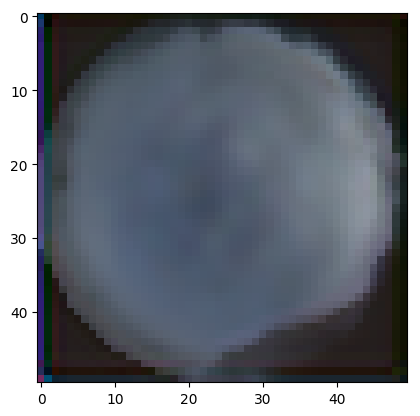

[[[ 0.          0.22859979  0.38461548]
  [ 0.00170401  0.05474179  0.        ]
  [ 0.1500499   0.04966806  0.02561817]
  ..., 
  [ 0.11391336  0.08147317  0.0349728 ]
  [ 0.11019193  0.10175024  0.01065908]
  [ 0.1480532   0.05788117  0.03768061]]

 [[ 0.11094323  0.22062072  0.43494922]
  [ 0.          0.02938057  0.        ]
  [ 0.16754779  0.06551587  0.07063323]
  ..., 
  [ 0.11341082  0.0732026   0.05161913]
  [ 0.08088844  0.09574128  0.01136369]
  [ 0.04893251  0.04166789  0.        ]]

 [[ 0.1523678   0.14064798  0.42335123]
  [ 0.          0.13085425  0.        ]
  [ 0.16540179  0.09741953  0.07566112]
  ..., 
  [ 0.13519192  0.09310445  0.08243553]
  [ 0.09231725  0.08172978  0.01969321]
  [ 0.06936087  0.0659847   0.00660897]]

 ..., 
 [[ 0.24732596  0.10347828  0.32561433]
  [ 0.          0.17209119  0.1130667 ]
  [ 0.20488587  0.08963531  0.10502395]
  ..., 
  [ 0.15738091  0.10457721  0.1264042 ]
  [ 0.10031413  0.08365908  0.05323793]
  [ 0.05816676  0.07685219  0.06075

In [93]:
tmp = array_pred[10]
# tmp = tmp[0:1, 0:1, :]
# tmp[tmp <= 0] = 0
tmp.shape
show_img(tmp)
print(tmp)

(280, 50, 50, 3)

# videoの作成

In [55]:
import skvideo.io
import numpy as np
import os
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [199]:
# file listの並び替え
path = './RESULT/tmp/'
file_list = os.listdir(path)
animate_list = []
append = animate_list.append
for filename in file_list:
    if filename.startswith('animate'):
        append(filename)
animate_list.sort(key=lambda x:int(x.split('_')[2].split('.')[0]))

In [201]:
# 画像を作る
im_list = []
append = im_list.append
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
ax.spines['left'].set_color('None')
ax.spines['bottom'].set_color('None')
ax.tick_params(axis='x', which='both', top='off', bottom='off', labelbottom='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')

def update(i, fig_title, animate_list):
    if i != 0:
        plt.cla()
    imgfile = animate_list[i]
    img_path = os.path.join(path, imgfile)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(fig_title + str(i+1))
    
ani = animation.FuncAnimation(fig, update, fargs=('Logloss at TIME:  ', animate_list), interval=300, frames=15)

# GIFの書き出し
# ani = animation.ArtistAnimation(fig, im_list, interval=200, repeat_delay=1000)
ani.save('test.gif', writer='imagemagick')